In [1]:
# importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train1=train.copy()
test1=test.copy()
# backup original files if we do un-necessary changes 

In [4]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# in this case we have Loan_Status as target variable

In [9]:
# first take a look of target variable--univariate
train['Loan_Status'].count()

614

In [10]:
train.Loan_Status.isnull().sum()

0

In [11]:
train.Loan_Status.isnull().count()

614

In [12]:
train.Loan_Status.notnull().count()

614

In [13]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:title={'center':'Loan_Status'}>

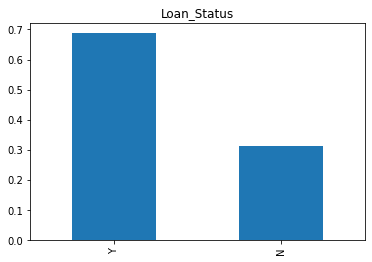

In [15]:
train.Loan_Status.value_counts(normalize=True).plot.bar(title='Loan_Status',)

<AxesSubplot:>

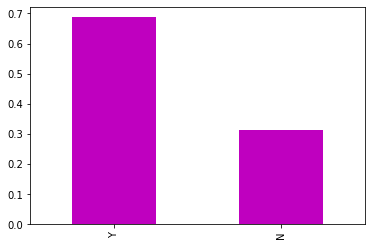

In [16]:
train.Loan_Status.value_counts(normalize=True).plot.bar("Loan_Status",color='m')

In [17]:
# let's do analysis of another varaibles

In [18]:
train.Gender.count()

601

In [19]:
train.Gender.isnull().sum()
# so it contain 13 null values

13

In [20]:
train.Gender.notnull().sum()


601

In [21]:
train.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [22]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
train.Gender.value_counts(normalize=True)*100
# values in proportion

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

<AxesSubplot:title={'center':'Gender'}>

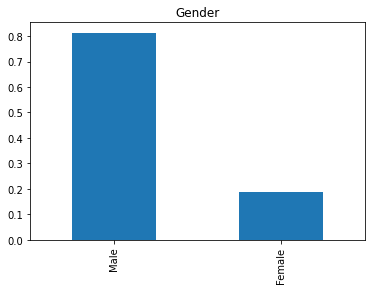

In [24]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
# 81%--Male and 19%--Female

<AxesSubplot:title={'center':'Gender'}>

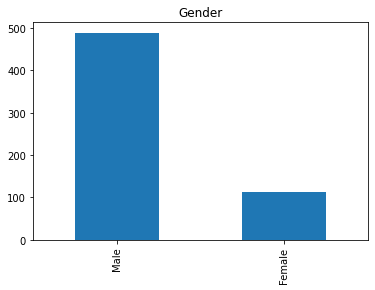

In [25]:
train.Gender.value_counts().plot.bar(title='Gender')

In [26]:
train.Married.count()

611

In [27]:
train.Married.isnull().sum()

3

In [28]:
train.Married.value_counts(normalize=True)*100


Yes    65.139116
No     34.860884
Name: Married, dtype: float64

<AxesSubplot:title={'center':'Married'}>

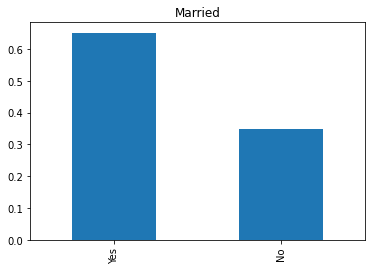

In [29]:
train.Married.value_counts(normalize=True).plot.bar(title="Married")

In [30]:
train.Self_Employed.count()

582

In [31]:
train.Self_Employed.isnull().sum()

32

In [32]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [33]:
train.Self_Employed.value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

In [34]:
train.Self_Employed.is_unique

False

In [35]:
train.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [36]:
train.Self_Employed.unique().shape

(3,)

<AxesSubplot:title={'center':'Self_Employed'}>

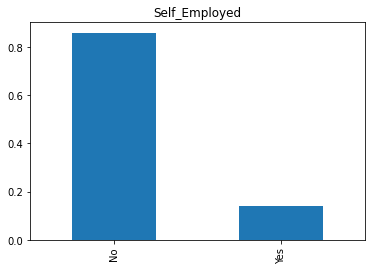

In [37]:
train.Self_Employed.value_counts(normalize=True).plot.bar(title="Self_Employed")

In [38]:
# here we can see that among 582 people only 14% are self_employed and rest of the 86% are not self_employed

In [39]:
train.Credit_History.count()

564

In [40]:
train.Credit_History.isnull().sum()

50

In [41]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [42]:
train.Credit_History.unique()

array([ 1.,  0., nan])

In [43]:
train.Credit_History.head(2)

0    1.0
1    1.0
Name: Credit_History, dtype: float64

In [44]:
train.Credit_History.value_counts(normalize=True)*100
# around 84% applicants have repaid their debts

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

<AxesSubplot:title={'center':'Creadit_history'}>

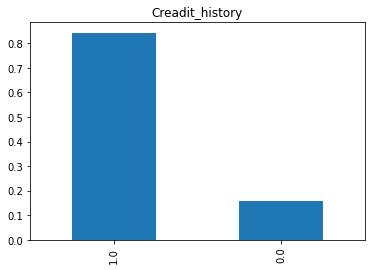

In [45]:
train.Credit_History.value_counts(normalize=True).plot.bar(title='Creadit_history')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
train.Dependents.count()

599

In [48]:
train.Dependents.isnull().sum()

15

In [49]:
train.Dependents.unique()
# it's a ordinal categorical featrues

array(['0', '1', '2', '3+', nan], dtype=object)

In [50]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [51]:
train.Dependents.value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependants'}>

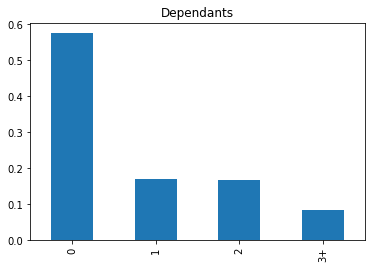

In [52]:
train.Dependents.value_counts(normalize=True).plot.bar(title='Dependants')

In [53]:
train.Education.count()

614

In [54]:
train.Education.isnull().sum()

0

In [55]:
train.Education.is_unique

False

In [56]:
train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [57]:
train.Education.value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

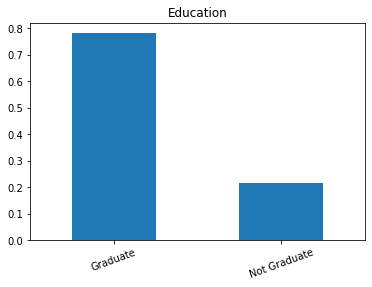

In [58]:
train.Education.value_counts(normalize=True).plot.bar(title='Education')
plt.xticks(rotation=20)

In [59]:
train.Property_Area.count()

614

In [60]:
train.Property_Area.isnull().sum()

0

In [61]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [62]:
train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

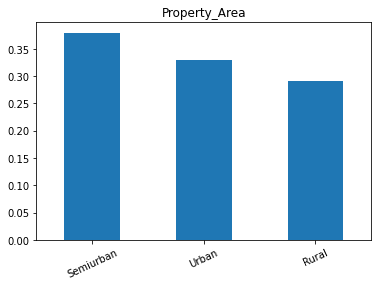

In [63]:
train.Property_Area.value_counts(normalize=True).plot.bar(title="Property_Area")
plt.xticks(rotation=25)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
train.ApplicantIncome.head(2)

0    5849
1    4583
Name: ApplicantIncome, dtype: int64

In [66]:
train.ApplicantIncome.isnull().sum()

0

In [67]:
train.ApplicantIncome.is_unique

False

Text(0.5, 0.98, 'Applicant_Income')

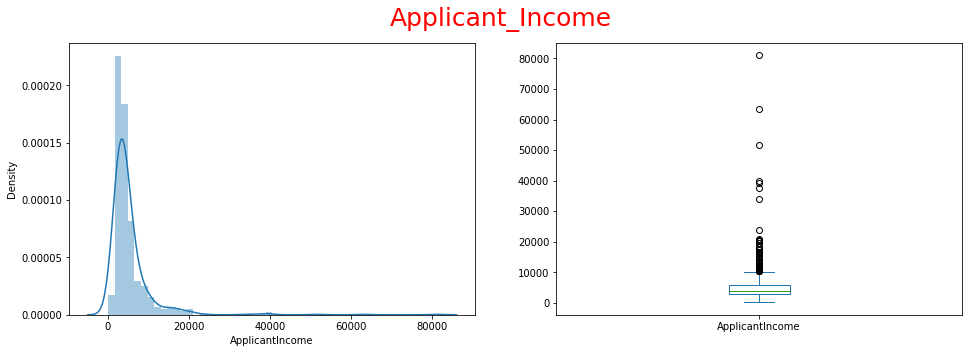

In [68]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.distplot(train.ApplicantIncome)
plt.subplot(122)
train.ApplicantIncome.plot.box(figsize=(16,5))
plt.suptitle('Applicant_Income',size=25,color='red')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

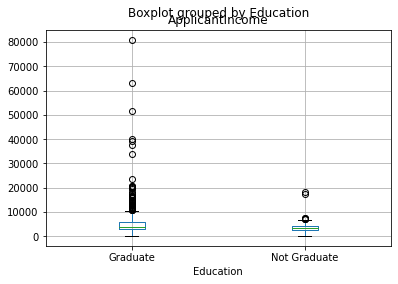

In [69]:
train.boxplot(column='ApplicantIncome',by='Education')

In [70]:
# here we can see that there are a high numbers of graduates with 
# very high income, which are appearing to be  the outliers.

In [71]:
train.CoapplicantIncome.dtype

dtype('float64')

In [72]:
train.CoapplicantIncome.count()

614

In [73]:
train.CoapplicantIncome.isnull().sum()

0

In [74]:
train.CoapplicantIncome.is_unique

False

<AxesSubplot:>

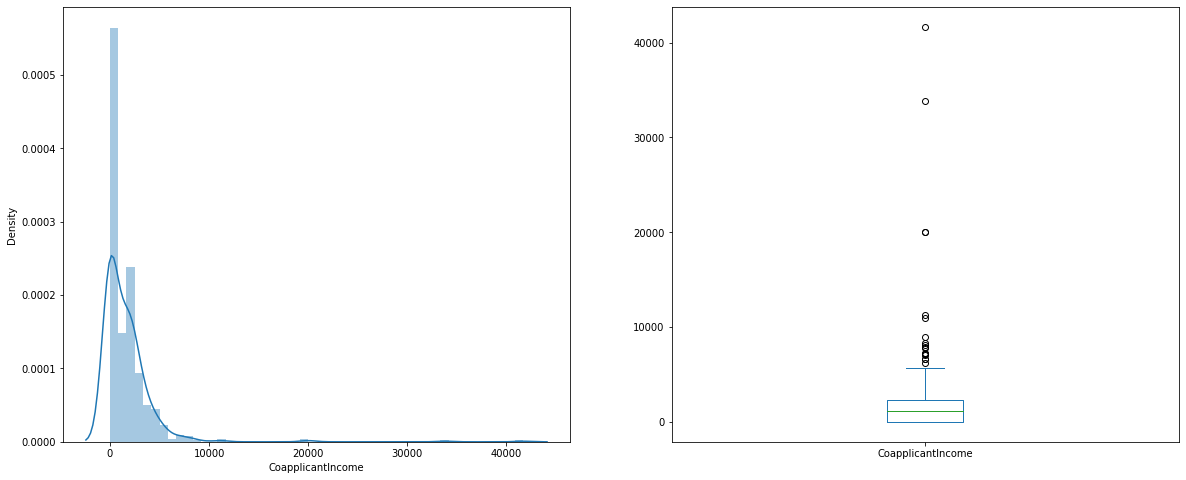

In [75]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.distplot(train.CoapplicantIncome)

plt.subplot(122)
train.CoapplicantIncome.plot.box()

<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='Education'>

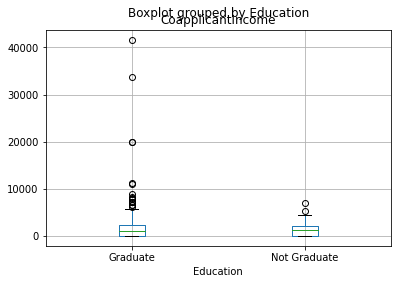

In [76]:
train.boxplot(column='CoapplicantIncome',by='Education')

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [78]:
train.LoanAmount.dtype

dtype('float64')

In [79]:
train.LoanAmount.count()

592

In [80]:
train.LoanAmount.notnull().sum()
# not null values


592

In [81]:
train.LoanAmount.isnull().sum()
#  null values

22

In [82]:
train.LoanAmount.is_unique

False

In [83]:
train.LoanAmount.head(4)

0      NaN
1    128.0
2     66.0
3    120.0
Name: LoanAmount, dtype: float64

<AxesSubplot:>

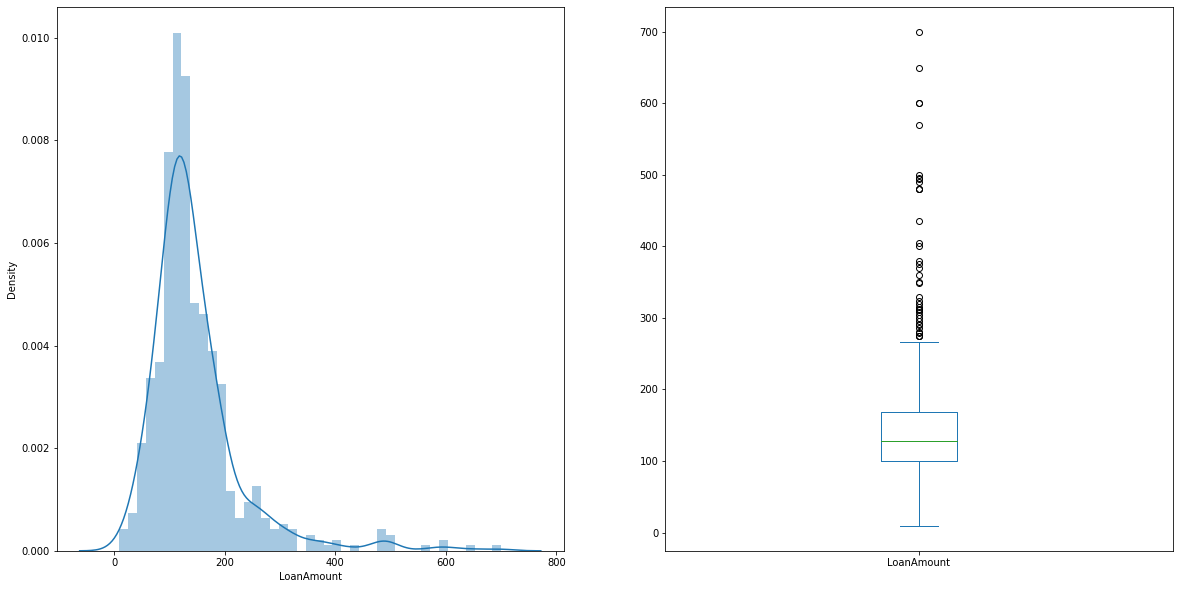

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(train.LoanAmount)

plt.subplot(122)
train.LoanAmount.plot.box()

In [85]:
train.LoanAmount.mean()

146.41216216216216

In [86]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [87]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

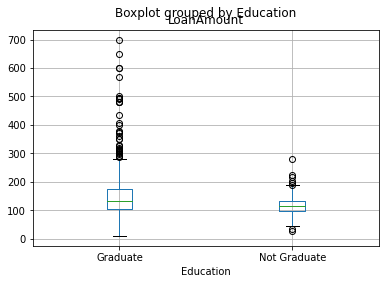

In [88]:
train.boxplot(column='LoanAmount',by='Education')

In [89]:
train.Loan_Amount_Term.count()

600

In [90]:
train.Loan_Amount_Term.isnull().sum()

14

In [91]:
df=train.dropna()
# dropped all null values but it's not a good practice if we've
#  a less records.
# temp create df

In [92]:
df.Loan_Amount_Term.count()

480

In [93]:
df.Loan_Amount_Term.isnull().sum()

0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<AxesSubplot:>

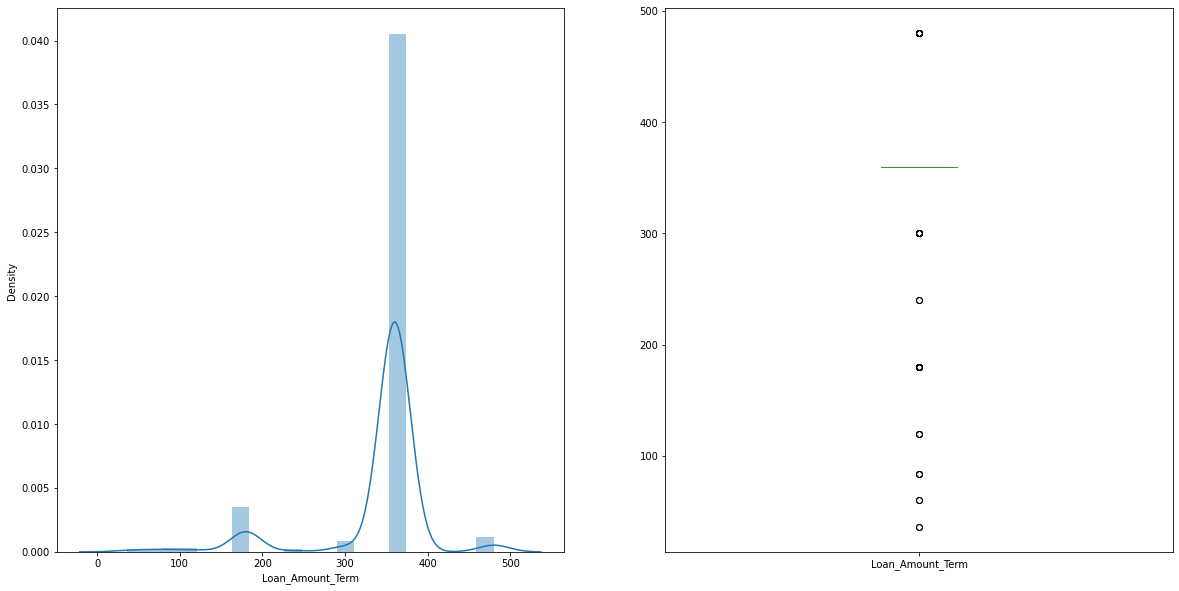

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(df.Loan_Amount_Term)

plt.subplot(122)
df.Loan_Amount_Term.plot.box()

<AxesSubplot:>

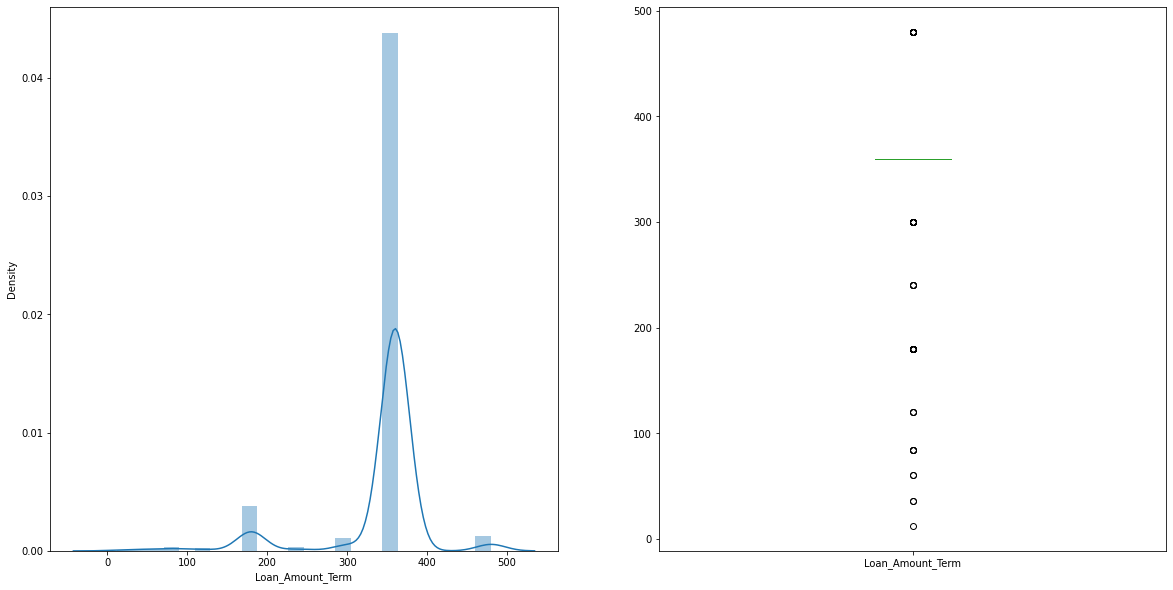

In [96]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.distplot(train.Loan_Amount_Term)

plt.subplot(122)
train.Loan_Amount_Term.plot.box()

In [97]:
# Gender vs Loan_Status
pd.crosstab(train.Gender,train.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [98]:
train.Gender.value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

In [99]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

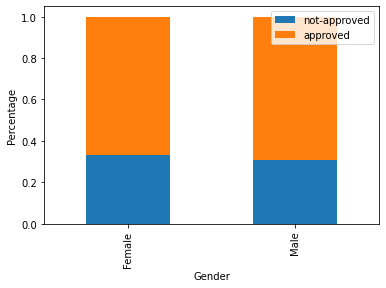

In [100]:
# let's try to get proportion of approved or not-approved loan
# by Gender
gender=pd.crosstab(train.Gender,train.Loan_Status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=
                                                   True)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(['not-approved','approved'],loc='best')

In [101]:
# male(appr)-339,female(appr)-75
# male(not-appr)-150,female(not-appr)-75

In [102]:
# Married vs Loan_Status
pd.crosstab(train.Married,train.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [103]:
married=pd.crosstab(train.Married,train.Loan_Status)


In [104]:
married.div(married.sum(1).astype(float),axis=0)
# married.div(married.sum(0).astype(float),axis=1)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


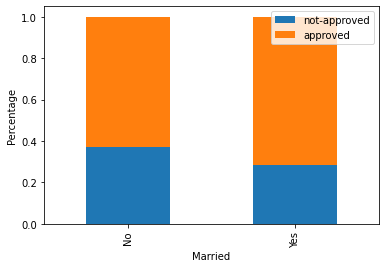

In [105]:
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',
                                                     stacked=True,)
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.legend(['not-approved','approved'],loc='best')

In [106]:
# proportion of married applicants is higher for appr. loans

In [107]:
# Dependants vs Loan_Status
pd.crosstab(train.Dependents,train.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [108]:
dependants=pd.crosstab(train.Dependents,train.Loan_Status)

In [109]:
dependants.div(dependants.sum(1).astype(float),axis=0)
# it gives proportion of Loan_Status for individual Dependants
# it's usefull in this case.bcuz we want proportion of Loan_Status

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


In [110]:
dependants.div(dependants.sum(0).astype(float),axis=1)
# it gives proportion of Dependants for Loan_Status

Loan_Status,N,Y
Dependents,,
0,0.575269,0.576271
1,0.193548,0.159806
2,0.134409,0.184019
3+,0.096774,0.079903


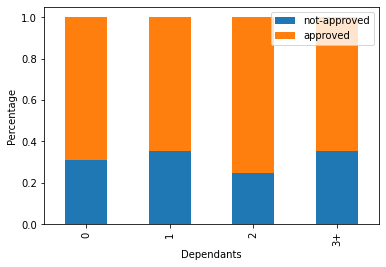

In [111]:
dependants.div(dependants.sum(1).astype(float),axis=0).plot(kind='bar',
                                                           stacked=True,)
plt.xlabel('Dependants')
plt.ylabel('Percentage')
plt.legend(['not-approved','approved'],loc='best')

In [112]:
# we can see proportion of 1 Dependants nd 3+ dependants are equal
# and for 2 Dependants we got more loan approvals

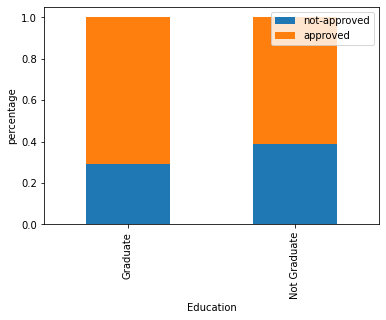

In [113]:
# Education vs Loan_Status
education=pd.crosstab(train.Education,train.Loan_Status)
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',
                                                         stacked=True,)
plt.xlabel('Education')
plt.ylabel('percentage')
plt.legend(['not-approved','approved'],loc='best')

In [114]:
# proportion of Graduate applicants is higher for them Loan_appr

Text(0, 0.5, 'Percentage')

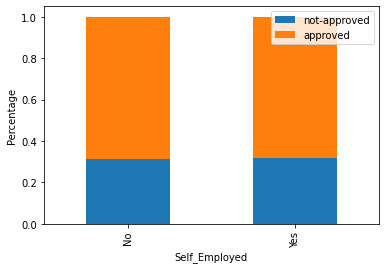

In [115]:
# Self_Employed vs Loan_Status
self_emp=pd.crosstab(train.Self_Employed,train.Loan_Status)
self_emp.div(self_emp.sum(1).astype(float),axis=0).plot(kind='bar',
                                                       stacked=True,)
plt.legend(['not-approved','approved'],loc='best')
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')

In [116]:
self_emp.div(self_emp.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


In [117]:
# there is nothing significant we can infer from both of this features

Text(0, 0.5, 'Percentage')

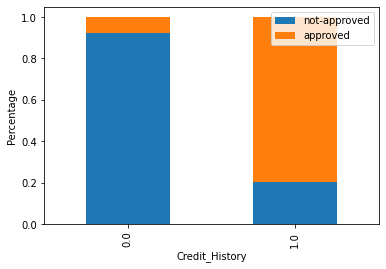

In [118]:
# Credit_Histroy vs Loan_Status
credit=pd.crosstab(train.Credit_History,train.Loan_Status)
credit.div(credit.sum(1).astype(float),axis=0).plot(kind='bar',
                                                   stacked=True,)
plt.legend(['not-approved','approved'],loc='best')
plt.xlabel('Credit_History')
plt.ylabel('Percentage')

In [119]:
# it seems people with  credit History  as 1 are more likely to get their
# loan approved

(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Semiurban'), Text(2, 0, 'Urban')])

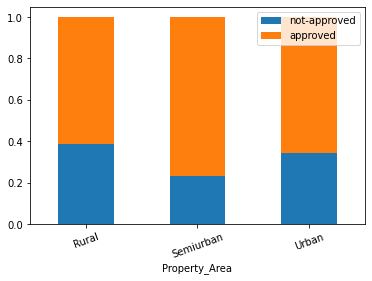

In [120]:
# Property_Area vs Loan_Status
area=pd.crosstab(train.Property_Area,train.Loan_Status)
area.div(area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,)
plt.legend(['not-approved','approved'],loc='best')
plt.xticks(rotation=20)

<AxesSubplot:xlabel='Property_Area'>

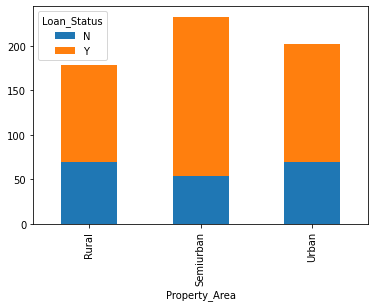

In [121]:
area.plot(kind='bar',stacked=True)
# above result in proportion format(Percentage) and this is in numerical format

In [122]:
pd.crosstab(train.Property_Area,train.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [123]:
# proportion of loans getting approved in semiurban area is higher as
# compared to that in rural or urban areas.

In [124]:
# Numerical Independent Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

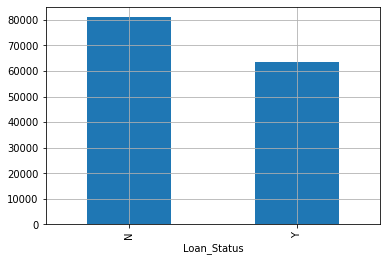

In [125]:
# ApplicantIncome vs Loan_Status
train.groupby('Loan_Status')['ApplicantIncome'].max().plot.bar(grid=True)
# applicant whose income is more than 65,000 is not approved for loan

<AxesSubplot:xlabel='Loan_Status'>

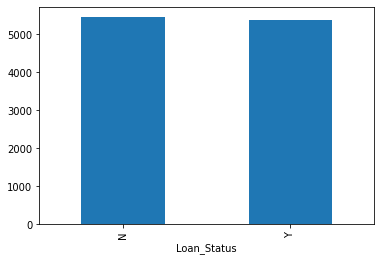

In [126]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [127]:
print(train.ApplicantIncome.min())
print(train.ApplicantIncome.max())
print(train.ApplicantIncome.mean())

150
81000
5403.459283387622


In [128]:
# here we don't see any changes in the mean income .so lets make bins
# for applicant income.
bins=[0,2500,4000,6000,81000]
labels=['Low','Average','High','very-High']
train['income_bin']=pd.cut(df.ApplicantIncome,bins,labels=labels)

In [129]:
train.income_bin.tail(5)

609      Average
610         High
611    very-High
612    very-High
613         High
Name: income_bin, dtype: category
Categories (4, object): ['Low' < 'Average' < 'High' < 'very-High']

In [130]:
train.ApplicantIncome.head(3)

0    5849
1    4583
2    3000
Name: ApplicantIncome, dtype: int64

Text(0, 0.5, 'Percentage')

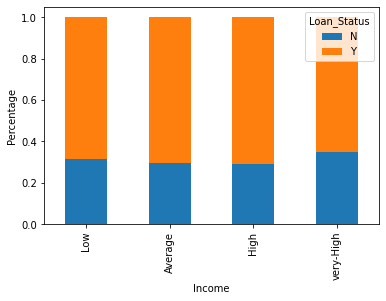

In [131]:
income=pd.crosstab(train.income_bin,train.Loan_Status)
income.div(income.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True')
plt.xlabel('Income')
plt.ylabel('Percentage')

In [132]:
# It can be inferred that Applicant income does not affect the chances 
# of loan approval which contradicts our hypothesis in which we assumed 
# that if the applicant income is high the chances of loan approval
# will also be high.


In [133]:
print(train.CoapplicantIncome.min())
print(train.CoapplicantIncome.max())
print(train.CoapplicantIncome.mean())

0.0
41667.0
1621.2457980271008


In [134]:
bins=[0,1000,3000,42000]
lable=['low','average','high']
train['CoapplicantIncome_bin']=pd.cut(df.CoapplicantIncome,bins,labels=lable)

In [135]:
train.CoapplicantIncome_bin.head(10)

0        NaN
1    average
2        NaN
3    average
4        NaN
5       high
6    average
7    average
8    average
9       high
Name: CoapplicantIncome_bin, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [136]:
income=pd.crosstab(train.CoapplicantIncome_bin,train.Loan_Status)

In [137]:
income

Loan_Status,N,Y
CoapplicantIncome_bin,,
low,3,15
average,46,123
high,24,53


<AxesSubplot:xlabel='CoapplicantIncome_bin'>

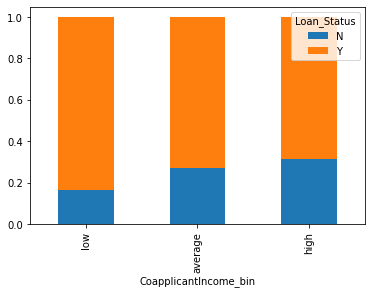

In [138]:
income.div(income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [139]:
# here if income of coapplicant is low then there is high chances of
# loan approved..
# but it not look right,may be most of applicants don't have any coapplicant
# so try to visualize  applicant and coapplicant income together

In [140]:
train['totalincome']=train.ApplicantIncome+train.CoapplicantIncome

In [141]:
train.totalincome.head(3)

0    5849.0
1    6091.0
2    3000.0
Name: totalincome, dtype: float64

In [142]:
print(train.totalincome.min())
print(train.totalincome.max())
print(train.totalincome.mean())

1442.0
81000.0
7024.705081414722


In [143]:
bins=[0,2500,4000,6000,81000]
labels=['low','average','high','very high']
train['totalincme_bin']=pd.cut(train.totalincome,bins,labels=labels)

In [144]:
train.totalincme_bin.tail(4)

610         high
611    very high
612    very high
613         high
Name: totalincme_bin, dtype: category
Categories (4, object): ['low' < 'average' < 'high' < 'very high']

Text(0, 0.5, 'Percentage')

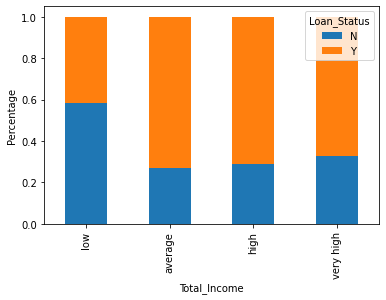

In [145]:
totalincome=pd.crosstab(train.totalincme_bin,train.Loan_Status)
totalincome.div(totalincome.sum(1).astype(float),axis=0).plot(kind='bar',
                                                             stacked=True,)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [146]:
# We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as
# compared to that of applicants with Average, High and Very High Income.


Loan_Status
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
Name: LoanAmount, dtype: object

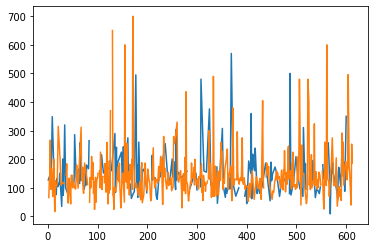

In [147]:
# Loan amount(k) vs Loan_Status
train.groupby('Loan_Status')['LoanAmount'].plot()

In [148]:
# we can't visualize correctly LoanAmount this way, so create bins
print(train.LoanAmount.min())
print(train.LoanAmount.max())
print(train.LoanAmount.mean())

9.0
700.0
146.41216216216216


In [149]:
bins=[0,100,200,700]
labels=['low','avg','high']
train['LoanAmount_bin']=pd.cut(train.LoanAmount,bins,labels=labels)

Text(0, 0.5, 'Percentage')

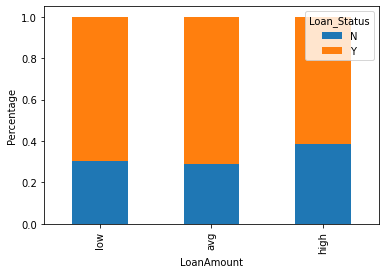

In [150]:
loan_amt=pd.crosstab(train.LoanAmount_bin,train.Loan_Status)
loan_amt.div(loan_amt.sum(1).astype(float),axis=0).plot(kind='bar',
                                                       stacked=True,)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [151]:
# It can be seen that the proportion of approved loans is higher for Low
# and Average Loan Amount as compared to that of High Loan Amount which 
# supports our hypothesis in which we considered that the chances of 
# loan approval will be high when the loan amount is less.

In [152]:
train=train.drop(['LoanAmount_bin','totalincme_bin','totalincome',
                 'CoapplicantIncome_bin','income_bin'],axis=1)

In [153]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [154]:
# let's convert non-num values of Dependents to  numeric values as well as for Loan_Status 
train.Dependents.replace('3+',3,inplace=True)
test.Dependents.replace('3+',3,inplace=True)
train.Loan_Status.replace('N',0,inplace=True)
train.Loan_Status.replace('Y',1,inplace=True)


In [155]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [156]:
train.Dependents.head(5)

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [158]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'ApplicantIncome'),
  Text(0, 1.5, 'CoapplicantIncome'),
  Text(0, 2.5, 'LoanAmount'),
  Text(0, 3.5, 'Loan_Amount_Term'),
  Text(0, 4.5, 'Credit_History'),
  Text(0, 5.5, 'Loan_Status')])

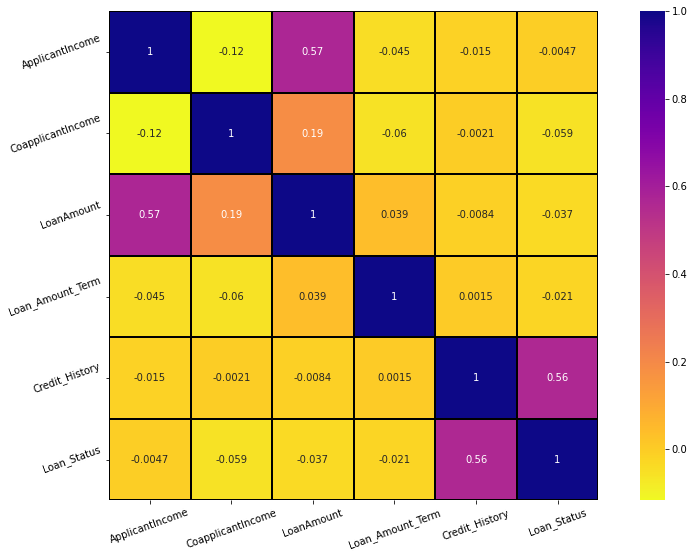

In [159]:
correlation=train.corr()
plt.figure(figsize=(15,9))
sns.heatmap(correlation,square=True,cmap='plasma_r',annot=True,linewidths=2,
           linecolor='k',)
plt.xticks(rotation=20)
plt.yticks(rotation=20)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'ApplicantIncome'),
  Text(0, 1.5, 'CoapplicantIncome'),
  Text(0, 2.5, 'LoanAmount'),
  Text(0, 3.5, 'Loan_Amount_Term'),
  Text(0, 4.5, 'Credit_History'),
  Text(0, 5.5, 'Loan_Status'),
  Text(0, 6.5, 'total')])

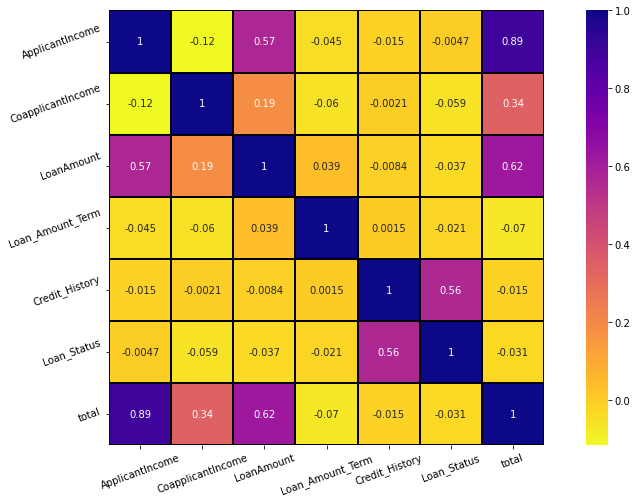

In [160]:
train['total']=train.ApplicantIncome+train.CoapplicantIncome
corr=train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,square=True,cmap='plasma_r',annot=True,linewidths=2,
           linecolor='k',)
plt.xticks(rotation=20)
plt.yticks(rotation=20)

In [161]:
train.total.head(2)
train=train.drop(['total'],axis=1)

In [162]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [163]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [164]:
# We can consider these methods to fill the missing values:

# For numerical variables: imputation using mean or median

# For categorical variables: imputation using mode

In [165]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)

In [166]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [167]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [168]:
train.Loan_Amount_Term.isnull().sum()

0

In [169]:
# Now we will see the LoanAmount variable. As it is a numerical variable,
# we can use mean or median to impute the missing values.

In [170]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace=True)

In [171]:
train.isnull().sum()
# so, we have handled all the Missing Values[Nan,NaN,NA]

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [172]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [173]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

In [174]:
test.isnull().sum()
# handled all missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

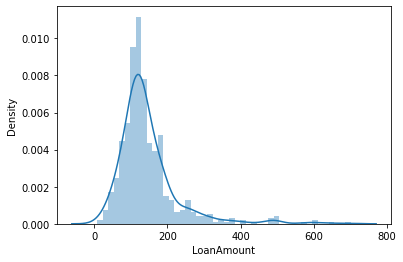

In [175]:
sns.distplot(train.LoanAmount)

In [176]:
# LoanAmount variable is Fairly distributed
# it has right skewnewss

<AxesSubplot:>

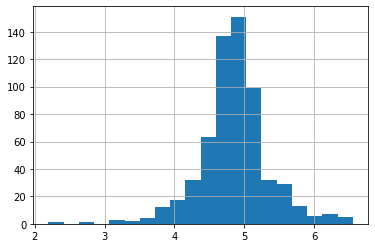

In [177]:
train['LoanAmount_log']=np.log(train.LoanAmount)
train.LoanAmount_log.hist(bins=20)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

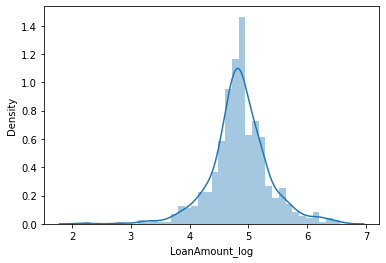

In [178]:
sns.distplot(train.LoanAmount_log)

<AxesSubplot:>

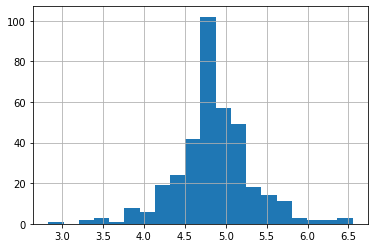

In [179]:
test['LoanAmount_log']=np.log(train.LoanAmount)
test.LoanAmount_log.hist(bins=20)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

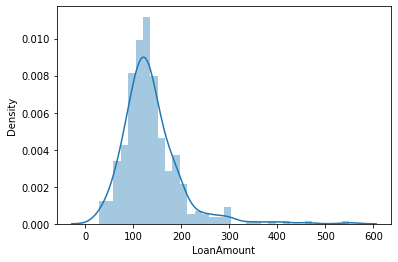

In [180]:
sns.distplot(test.LoanAmount)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

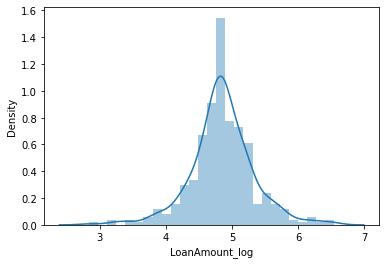

In [181]:
sns.distplot(test.LoanAmount_log)

In [182]:
# now our LoanAmount is Nomal Distributed


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  LoanAmount_log     367 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 37.4+ KB


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
 13  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 67.3+ KB


In [185]:
# for feature eng. let's create new featrures---> EMI,TotalIncome nd Balcance Income

In [186]:
train['TotalIncome']=train.ApplicantIncome+train.CoapplicantIncome

In [187]:
train.TotalIncome.head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: TotalIncome, dtype: float64

In [188]:
test['TotalIncome']=test.ApplicantIncome+test.CoapplicantIncome

In [189]:
test.TotalIncome.head()

0    5720
1    4576
2    6800
3    4886
4    3276
Name: TotalIncome, dtype: int64

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

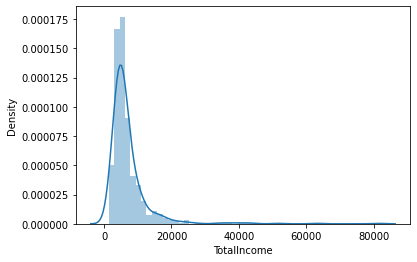

In [190]:
sns.distplot(train.TotalIncome)

In [191]:
# we can see it is shifted towards left, i.e. the distribution is right skewed.
# so, let's take the log transformation to make the distri. Normal

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

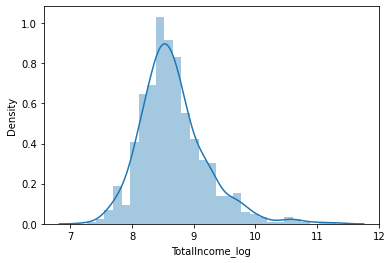

In [192]:
train['TotalIncome_log']=np.log(train.TotalIncome)
sns.distplot(train.TotalIncome_log)

In [193]:
# so now total income is well distributed

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

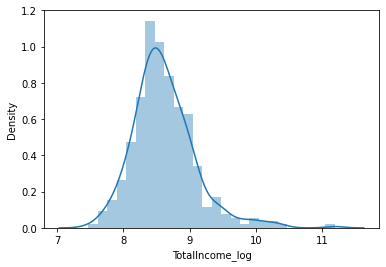

In [194]:
test['TotalIncome_log']=np.log(test.TotalIncome)
sns.distplot(test.TotalIncome_log)

In [195]:
train['EMI']=train.LoanAmount/train.Loan_Amount_Term
test['EMI']=test.LoanAmount/test.Loan_Amount_Term

In [196]:
train.EMI.head()

0    0.355556
1    0.355556
2    0.183333
3    0.333333
4    0.391667
Name: EMI, dtype: float64

<AxesSubplot:xlabel='EMI', ylabel='Density'>

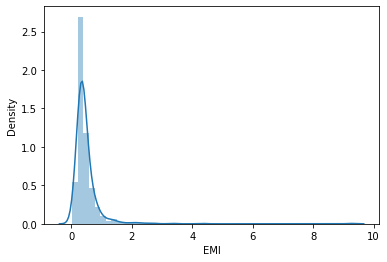

In [197]:
sns.distplot(train.EMI)

<AxesSubplot:xlabel='EMI', ylabel='Density'>

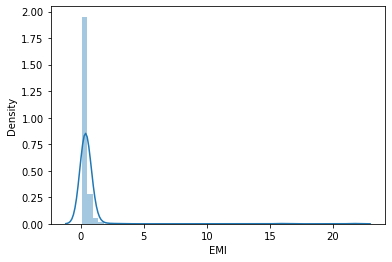

In [198]:
sns.distplot(test.EMI)

In [199]:
# our EMI is float so, we'll multiply our new Feature with 1000 to make the units equal
train['Balance_Income']=train.TotalIncome-train.EMI*1000
test['Balance_Income']=test.TotalIncome-train.EMI*1000

In [200]:
train.Balance_Income.head()

0    5493.444444
1    5735.444444
2    2816.666667
3    4607.666667
4    5608.333333
Name: Balance_Income, dtype: float64

In [201]:
test.Balance_Income.head()

0    5364.444444
1    4220.444444
2    6616.666667
3    4552.666667
4    2884.333333
Name: Balance_Income, dtype: float64

In [202]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'EMI',
       'Balance_Income'],
      dtype='object')

In [203]:
# now drop old features by which we created new featrues or log transformation
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                 'TotalIncome'],axis=1)

In [204]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,0.391667,5608.333333


In [205]:
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                 'TotalIncome'],axis=1)

In [206]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,8.651724,0.305556,5364.444444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,8.428581,0.350000,4220.444444
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,8.824678,0.577778,6616.666667
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,8.494129,0.277778,4552.666667
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,8.094378,0.216667,2884.333333


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Credit_History'),
  Text(0, 1.5, 'Loan_Status'),
  Text(0, 2.5, 'LoanAmount_log'),
  Text(0, 3.5, 'TotalIncome_log'),
  Text(0, 4.5, 'EMI'),
  Text(0, 5.5, 'Balance_Income')])

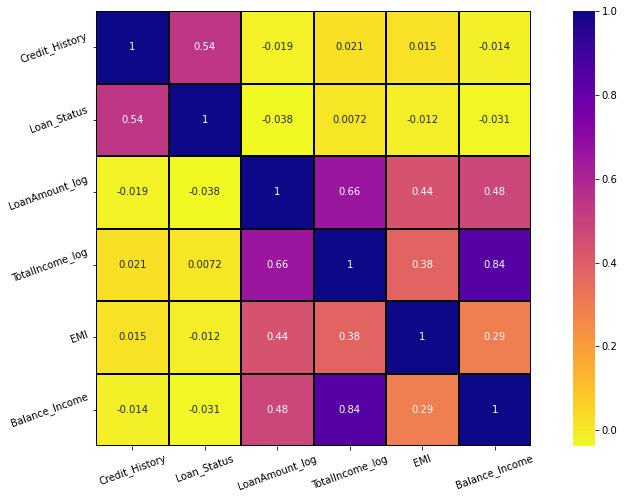

In [207]:
corr=train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,square=True,cmap='plasma_r',annot=True,linewidths=2,
           linecolor='k',)
plt.xticks(rotation=20)
plt.yticks(rotation=20)

In [208]:
# now data is more correlated

In [209]:
train.drop('Loan_ID',axis=1,inplace=True)

In [210]:
test.drop('Loan_ID',axis=1,inplace=True)

In [211]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.85203,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.85203,8.714568,0.355556,5735.444444


In [212]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,8.651724,0.305556,5364.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,8.428581,0.350000,4220.444444
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,8.824678,0.577778,6616.666667


In [213]:
x=train.drop('Loan_Status',1)

In [214]:
train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.85203,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.85203,8.714568,0.355556,5735.444444


In [215]:
x.head(2)
# x df without target variable

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,8.714568,0.355556,5735.444444


In [216]:
y=train.Loan_Status

In [217]:
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int64

In [218]:
# now let's create dummy variables for Categorical VAirables. Dummy var.
# turns cat. var to 0 nd 1
# there are too many methods for encoding

In [219]:
x=pd.get_dummies(x)

In [220]:
x.head(2)

,Credit_History,LoanAmount_log,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.85203,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0


In [221]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [222]:
# cross validation using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import accuracy_score #y_true-y_pred

In [224]:
logistic_model=LogisticRegression(C=1,random_state=1)

In [225]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1, random_state=1)

In [226]:
y_pred_logistic=logistic_model.predict(x_test)

In [227]:
score_logistic=accuracy_score(y_pred_logistic,y_test)*100

In [228]:
score_logistic

78.91891891891892

In [229]:
pred_test_logistic=logistic_model.predict(test)

In [230]:
logistic_model.predict_proba([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([[0.29720078, 0.70279922]])

In [231]:
logistic_model.predict([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([1])

# Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier #classification problem


In [233]:
tree_model=DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [234]:
y_pred_tree=tree_model.predict(x_test)

In [235]:
score_tree=accuracy_score(y_test,y_pred_tree)*100

In [236]:
score_tree

67.56756756756756

In [237]:
accuracy_score(y_pred_tree,y_test)*100

67.56756756756756

In [238]:
tree_model.predict_proba([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([[0., 1.]])

# Random Forest

In [239]:
# ensemble Method--> certain no.of weak learners are combined to make
# a powerful prediction model
from sklearn.ensemble import RandomForestClassifier  #classification 


In [240]:
forest_model=RandomForestClassifier(n_estimators=69,max_depth=10,random_state=1,
                                   n_jobs=2)

In [241]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=69, n_jobs=2, random_state=1)

In [242]:
pred_forest=forest_model.predict(x_test)

In [243]:
score_forest=accuracy_score(y_test,pred_forest)*100

In [244]:
score_forest

77.29729729729729

In [245]:
forest_model.predict_proba([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([[0.13221808, 0.86778192]])

In [246]:
forest_model.predict([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([1])

# Random Forest  Using Grid-SearchCV

In [247]:
# gridsearchcv--hyperparameter tunning
from sklearn.model_selection import GridSearchCV

In [248]:
parameters={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),parameters)

In [249]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [250]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=21, random_state=1)

In [251]:
# after hyperparameter tunning, we got best parameters
# let's create model using these parameters
grid_search_model=RandomForestClassifier(max_depth=3,n_estimators=21,random_state=1)

In [252]:
grid_search_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=21, random_state=1)

In [253]:
pred_grid_model=grid_search_model.predict(x_test)

In [254]:
score_grid_model=accuracy_score(y_test,pred_grid_model)*100

In [255]:
score_grid_model

78.37837837837837

In [256]:
grid_search_model.predict([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([1])

In [257]:
grid_search_model.predict_proba([[1.0,4.85203,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1]])

array([[0.21486459, 0.78513541]])

In [258]:
grid_search_model.get_params()
# list of used parameters in model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 21,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:title={'center':'Important Features'}>

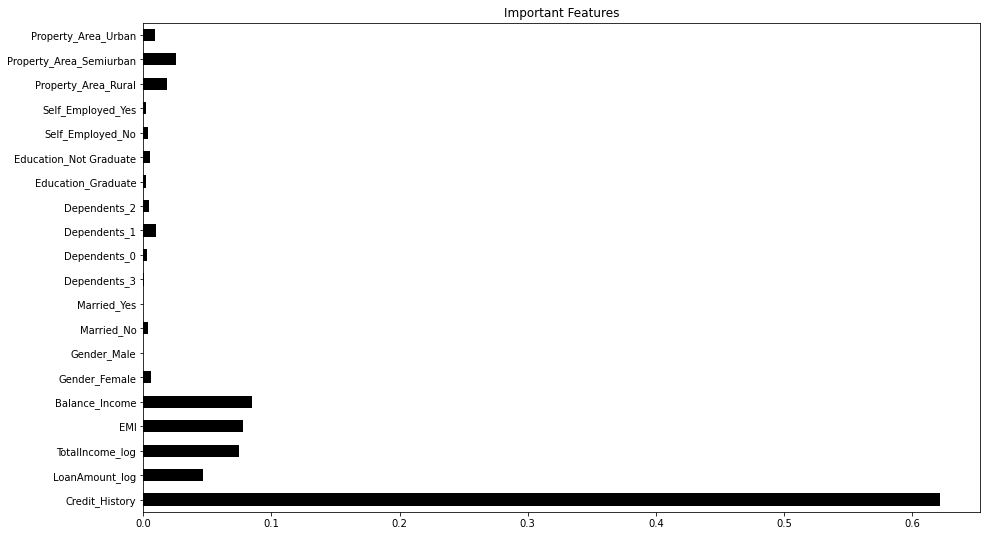

In [259]:
# find important features from model
plt.figure(figsize=(15,9))
important=pd.Series(grid_search_model.feature_importances_,index=x.columns)
important.plot(kind='barh',colormap='nipy_spectral',title='Important Features')

In [260]:
# so we can see, Creadit_histroy and Balance_income are the most important Features